# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit="metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather["main"]['temp_max']
        city_humidity = city_weather["main"]['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vel'sk
Processing Record 2 of Set 1 | nar'yan-mar
Processing Record 3 of Set 1 | whitehorse
Processing Record 4 of Set 1 | al kharijah
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | dwarka
Processing Record 8 of Set 1 | sao gabriel da cachoeira
Processing Record 9 of Set 1 | inverell
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | santarem
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | brookings
Processing Record 20 of Set 1 | balkanabat
Processing Record 21 of S

In [45]:
response=requests.get(url +"appid="+ weather_api_key + "&q=" + city+"&units="+unit).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -9.3852, 'lon': -171.2468},
 'dt': 1695576208,
 'id': 4031110,
 'main': {'feels_like': 32.07,
          'grnd_level': 1009,
          'humidity': 80,
          'pressure': 1009,
          'sea_level': 1009,
          'temp': 27.99,
          'temp_max': 27.99,
          'temp_min': 27.99},
 'name': 'Fale old settlement',
 'rain': {'1h': 0.4},
 'sys': {'country': 'TK', 'sunrise': 1695661960, 'sunset': 1695705637},
 'timezone': 46800,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 107, 'gust': 13.42, 'speed': 11.78}}


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vel'sk,61.0701,42.0983,14.82,95,100,3.48,RU,1695578253
1,nar'yan-mar,67.6713,53.0870,11.54,94,100,4.89,RU,1695578253
2,whitehorse,60.7161,-135.0538,0.43,86,75,0.00,CA,1695578253
3,al kharijah,25.4514,30.5464,31.02,16,3,4.71,EG,1695578254
4,college,64.8569,-147.8028,3.22,86,75,1.54,US,1695578254


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vel'sk,61.0701,42.0983,14.82,95,100,3.48,RU,1695578253
1,nar'yan-mar,67.6713,53.0870,11.54,94,100,4.89,RU,1695578253
2,whitehorse,60.7161,-135.0538,0.43,86,75,0.00,CA,1695578253
3,al kharijah,25.4514,30.5464,31.02,16,3,4.71,EG,1695578254
4,college,64.8569,-147.8028,3.22,86,75,1.54,US,1695578254


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

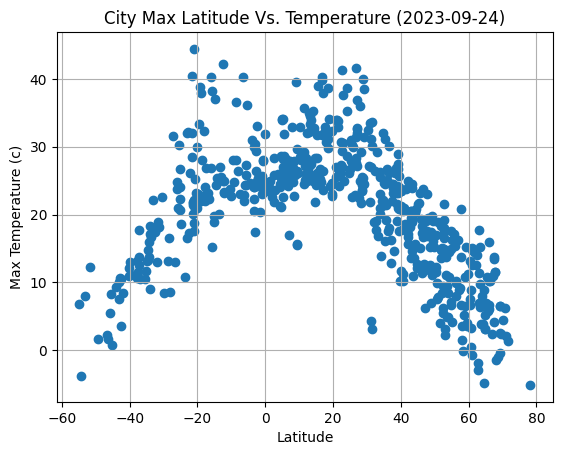

In [9]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]

plt.scatter(x_values,y_values,marker="o")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title("City Max Latitude Vs. Temperature (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

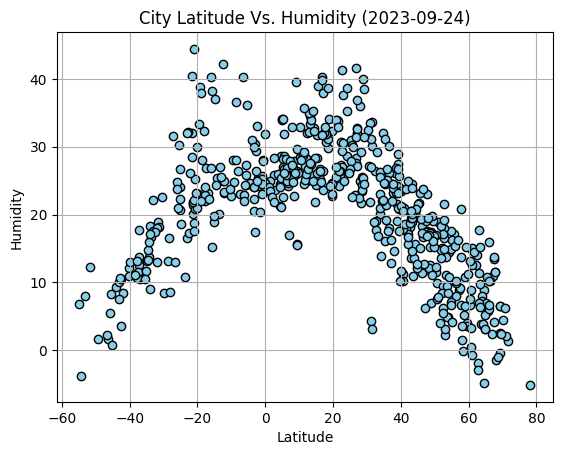

In [12]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude Vs. Humidity (2023-09-24)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

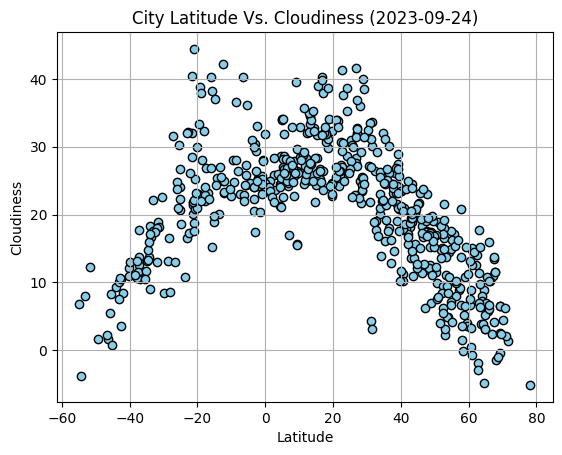

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude Vs. Cloudiness (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

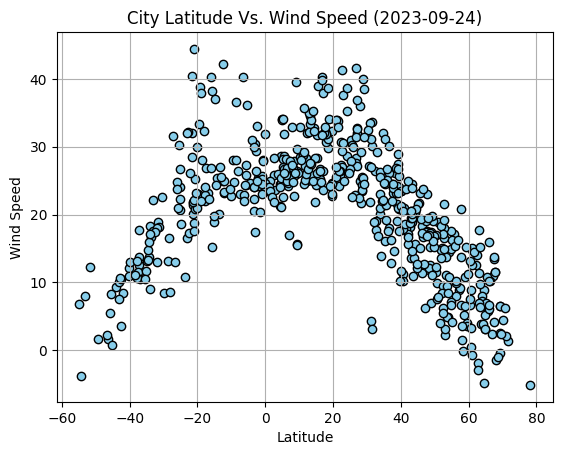

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o",edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude Vs. Wind Speed (2023-09-24)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Reference https://gendo90.github.io/python-api-challenge/
# Define a function to create Linear Regression plots
def Linear_regress(df,x_column,y_column):

    # regression input values
    (reg_slope, reg_intercept, reg_rvalue, _, _) = linregress(x_column,y_column)
    regress_value_x=np.array([a for a in range(int(min(x_column.values)),int(max(y_column.values)))])
    regress_values_y = x_column * reg_slope + reg_intercept
    plt.scatter(x_column,y_column)
    plt.plot(x_column,regress_values_y,"r")
    # plt.title(f"{list(x_column.values)}")
    line_eq="y = {:.2f} x + {:.2f}".format(reg_slope, reg_intercept)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    plt.show()
    
    #output of best fit line
    print("best fit line equation is  y = {:.2f} x + {:.2f}".format(reg_slope, reg_intercept))
    print("correlation coeffecient , r-value is = {:.2f}".format(reg_rvalue))


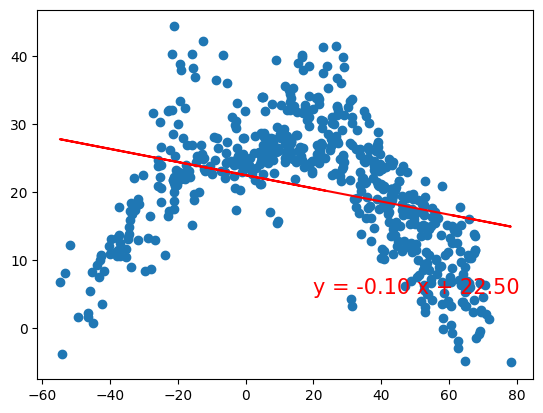

best fit line equation is  y = -0.10 x + 22.50
correlation coeffecient , r-value is = -0.32


In [103]:
Linear_regress(city_data_df,city_data_df["Lat"],city_data_df["Max Temp"])

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >=0,:]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vel'sk,61.0701,42.0983,14.82,95,100,3.48,RU,1695578253
1,nar'yan-mar,67.6713,53.0870,11.54,94,100,4.89,RU,1695578253
2,whitehorse,60.7161,-135.0538,0.43,86,75,0.00,CA,1695578253
3,al kharijah,25.4514,30.5464,31.02,16,3,4.71,EG,1695578254
4,college,64.8569,-147.8028,3.22,86,75,1.54,US,1695578254


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0,:]



# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,9.34,95,100,1.79,NZ,1695578254
7,sao gabriel da cachoeira,-0.1303,-67.0892,31.89,62,20,1.03,BR,1695578254
8,inverell,-29.7833,151.1167,8.42,88,0,0.45,AU,1695578255
9,blackmans bay,-43.0167,147.3167,10.07,78,33,3.75,AU,1695578255
11,puerto natales,-51.7236,-72.4875,12.25,43,40,6.69,CL,1695578255


In [93]:
northern_hemi_df.count()

City          421
Lat           421
Lng           421
Max Temp      421
Humidity      421
Cloudiness    421
Wind Speed    421
Country       421
Date          421
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

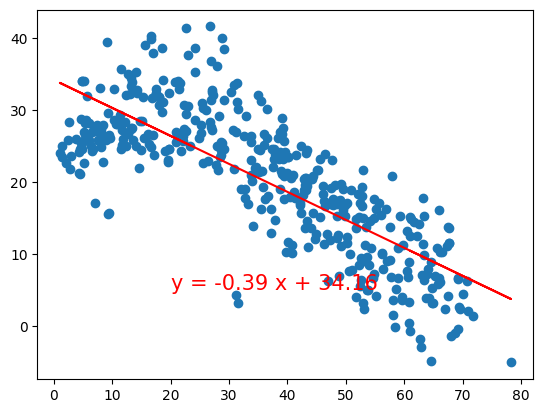

best fit line equation is  y = -0.39 x + 34.16
correlation coeffecient , r-value is = -0.79


In [104]:
# Linear regression on Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])


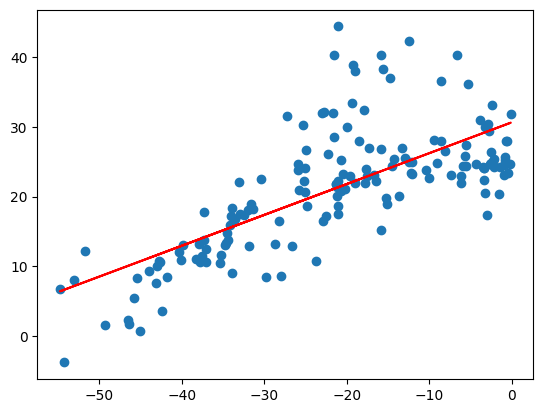

best fit line equation is  y = 0.44 x + 30.66
correlation coeffecient , r-value is = 0.71


In [106]:
# Linear regression on Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

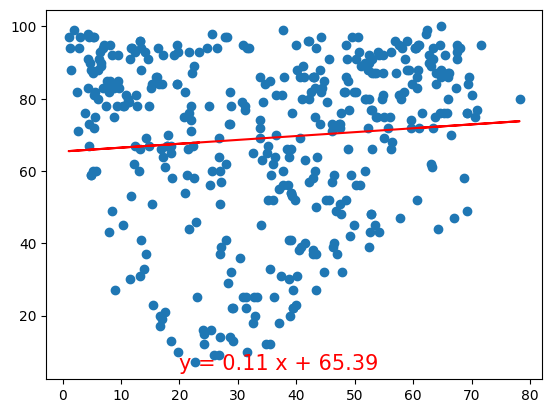

best fit line equation is  y = 0.11 x + 65.39
correlation coeffecient , r-value is = 0.09


In [107]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

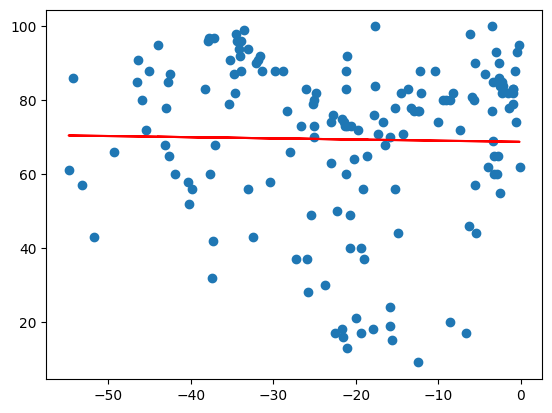

best fit line equation is  y = -0.03 x + 68.76
correlation coeffecient , r-value is = -0.02


In [108]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

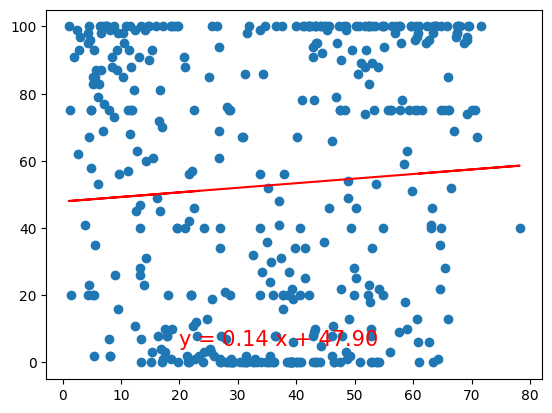

best fit line equation is  y = 0.14 x + 47.90
correlation coeffecient , r-value is = 0.07


In [109]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

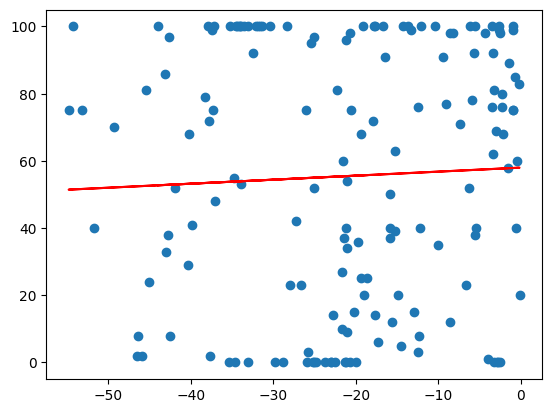

best fit line equation is  y = 0.12 x + 57.99
correlation coeffecient , r-value is = 0.05


In [110]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

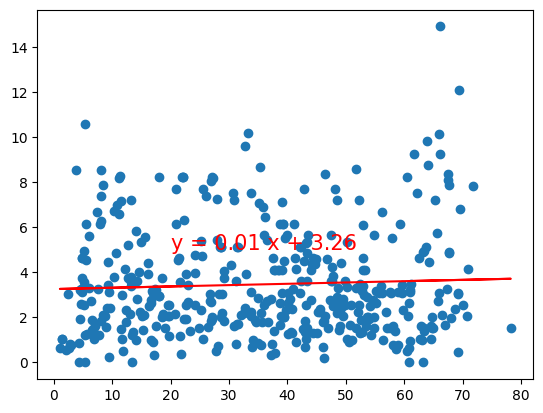

best fit line equation is  y = 0.01 x + 3.26
correlation coeffecient , r-value is = 0.05


In [111]:
# Northern Hemisphere
Linear_regress(northern_hemi_df,northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

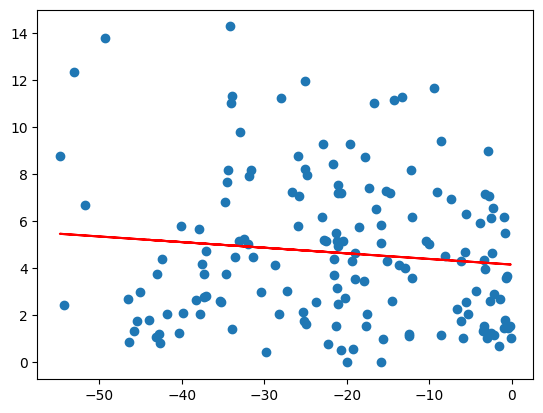

best fit line equation is  y = -0.02 x + 4.16
correlation coeffecient , r-value is = -0.11


In [112]:
# Southern Hemisphere
Linear_regress(southern_hemi_df,southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE